In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Packages Imported.")

Packages Imported.


In [4]:
DATA_LOC = 'E:/datasets/EMG_mendeley'

In [28]:
# dataset settings
fs = 2000

In [5]:
raw_df = pd.read_csv(f'{DATA_LOC}/30_raw.csv')
filtered_df = pd.read_csv(f'{DATA_LOC}/30_filtered.csv')

In [6]:
raw_df.head()

,-2.2259521484375,0.382080078125,0.64697265625,0
0,-2.254028,0.379639,0.649719,0.0
1,-2.262878,0.356140,0.652771,0.0
2,-2.237854,0.346375,0.650330,0.0
3,-2.199097,0.359802,0.649719,0.0
4,-2.151794,0.400696,0.653687,0.0


(0.0, 280000.0)

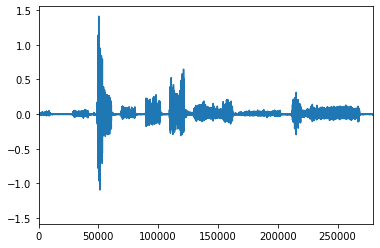

In [23]:
# plot one cycle
plt.plot(raw_df.iloc[:,3])
plt.xlim([0,280000])

In [16]:
raw_df.index

RangeIndex(start=0, stop=1279999, step=1)

In [7]:
filtered_df.head()

,-2.22540896199999,0.381986841297503,0.646814779193855,0
0,-2.231955,0.381160,0.647263,0.0
1,-2.246833,0.373415,0.649048,0.0
2,-2.245576,0.358697,0.649692,0.0
3,-2.215334,0.355457,0.647444,0.0
4,-2.173214,0.377518,0.646295,0.0


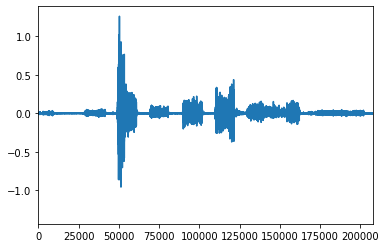

In [26]:
plt.plot(filtered_df.iloc[:,3])
start = 0
plt.xlim([start,start+208000]);

In [17]:
filtered_df.index

RangeIndex(start=0, stop=1279999, step=1)

In [29]:
first_cycle = filtered_df[0:104*fs]

In [31]:
first_cycle.head()

,-2.22540896199999,0.381986841297503,0.646814779193855,0
0,-2.231955,0.381160,0.647263,0.0
1,-2.246833,0.373415,0.649048,0.0
2,-2.245576,0.358697,0.649692,0.0
3,-2.215334,0.355457,0.647444,0.0
4,-2.173214,0.377518,0.646295,0.0


In [32]:
# add behavior labels
first_cycle['action'] = ['rest']*4*fs +  ['rest']*6*fs + ['rest']*4*fs + ['extension']*6*fs \
+ ['rest']*4*fs + ['flexion']*6*fs + ['rest']*4*fs + ['ulnar deviation']*6*fs + ['rest']*4*fs \
+ ['radial deviation']*6*fs + ['rest']*4*fs + ['grip']*6*fs + ['rest']*4*fs \
+ ['finger abduction']*6*fs + ['rest']*4*fs + ['finger adduction']*6*fs + ['rest']*4*fs \
+ ['supination']*6*fs + ['rest']*4*fs + ['pronation']*6*fs + ['rest']*4*fs

C:\Users\User\AppData\Local\Temp\ipykernel_10704\2665044891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_cycle['action'] = ['rest']*4*fs +  ['rest']*6*fs + ['rest']*4*fs + ['extension']*6*fs \


In [35]:
first_cycle['action'].unique()

array(['rest', 'extension', 'flexion', 'ulnar deviation',
       'radial deviation', 'grip', 'finger abduction', 'finger adduction',
       'supination', 'pronation'], dtype=object)

In [27]:
# cycle information
for rep=0:4 % 5 repetition, one cycle took 104 sec + 30 sec resting time, total 134 second fifth cycye only took 104 sec

        if rep==0
            rep_coeff=4; % first cycle: first REST start at fourth second and this cycle took 134 sec
        elseif rep==1
            rep_coeff=138; % second cycle: REST start at 138 sec= 104 sec (first cycle) + 30 sec (long rest) + 4 sec (begening rest)
        elseif rep==2
            rep_coeff=272; % third cycle: REST start at 272 sec= 268 sec (first two cycles) + 4 sec (begening rest)
        elseif rep==3
            rep_coeff=406; % fourth cycle: REST start at 406 sec= 402 sec (first three cycles) + 4 sec (begening rest)
        elseif rep==4
            rep_coeff=540
        end

In [ ]:
# feature extraction

# use sliding window that overlaps by half and calculate features for all channels individually

In [36]:
# settings
windowsize = 400
overlap = 200

In [56]:
i = 0

output = []
labels = []

while i+windowsize <= first_cycle.shape[0]:
    
    row = []
    for channel in first_cycle.columns[:-1]:
        
        raw_data = first_cycle[channel][i:i+windowsize]
        
        features = compute_features(raw_data)
        
        row.extend(features)
        
    if first_cycle['action'][i:i+windowsize].nunique() > 1:
        labels.append('Mixed')
    else:
        labels.append(first_cycle['action'][i:i+windowsize].iloc[0])
        
    i += (windowsize - overlap)
    output.append(row)

In [57]:
feature_df = pd.DataFrame(output)
feature_df['action'] = labels
feature_df

,0,1,2,3,4,5,6,7,8,9,10,11,action
0,212.075169,0.593293,346.528945,36.124706,0.122877,11.599006,61.177240,0.172782,30.315921,0.013717,0.001145,0.000838,rest
1,11.794478,0.063461,2.528314,2.719285,0.045403,1.255142,3.902250,0.015021,0.143929,0.013155,0.001617,0.002614,rest
2,2.227738,0.051320,1.600703,0.339971,0.037737,0.938824,0.183801,0.009694,0.058695,0.005436,0.001781,0.002914,rest
3,0.101605,0.044636,1.292511,0.145738,0.034116,0.805045,0.180198,0.009438,0.055573,0.001267,0.002017,0.004291,rest
4,0.643224,0.033359,0.788752,0.210326,0.037048,0.946680,0.063740,0.009144,0.051895,0.024736,0.002366,0.005972,rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,0.352779,0.036837,0.962085,0.629673,0.028314,0.498961,0.072367,0.012398,0.100407,0.020242,0.001254,0.000958,rest
1035,0.586116,0.037912,1.030304,0.294075,0.030959,0.600123,0.004965,0.013597,0.113518,0.019243,0.001202,0.000921,rest
1036,0.634657,0.036825,1.025323,0.681938,0.032918,0.654766,0.203291,0.012609,0.097892,0.003559,0.001206,0.000934,rest
1037,0.949688,0.036035,0.890316,0.260196,0.032066,0.673711,0.451274,0.012173,0.088218,0.017881,0.001275,0.001033,rest


In [58]:
feature_df['action'].unique()

array(['rest', 'Mixed', 'extension', 'flexion', 'ulnar deviation',
       'radial deviation', 'grip', 'finger abduction', 'finger adduction',
       'supination', 'pronation'], dtype=object)

In [37]:
def compute_features(data):
    # integrated EMG, Mean Absolute Value, Root Mean Square
    return [np.abs(np.sum(data)), np.mean(np.abs(data)), np.sum(data**2)]
    

In [59]:
# Machine Learning!

In [60]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [65]:
# function to fit the model and calculate score

def model_fit_pred(model, X, y, params=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
    
    if params is not None:
        m = model(**params)
    else:
        m = model()
    m.fit(X_train, y_train)
    
    preds = m.predict(X_test)
    
    return accuracy_score(y_test, preds)

# function to get the best parameters for the model
def get_best_params(model, X, y, params):
    
    clf = GridSearchCV(
        estimator = model(),
        param_grid = params,
        cv=5,
        n_jobs=5,
        verbose=1
    )

    clf.fit(X, y)
    best_params = clf.best_params_
    
    return best_params

# function to take in a model name and output scores
def model_test(model, X, y, params=None):

    score = model_fit_pred(model, X, y)
    print(f'{model}\n' + '-'*50 + '\n')
    print(f'Raw Score: {score}\n')

    if params is not None:
        best_params = get_best_params(model, X, y, params=params)
        best_params_score = model_fit_pred(model, X, y, 
                                           params=best_params)
        print(f'Best Params: {best_params}')
        print(f'Best Params Score: {best_params_score}')

In [63]:
X = feature_df.copy()
y = X.pop('action')

In [66]:
# Decision Tree

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

model_test(DecisionTreeClassifier, X, y, params=params)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
--------------------------------------------------

Raw Score: 0.7115384615384616

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best Params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.8, 'splitter': 'random'}
Best Params Score: 0.7307692307692307


In [67]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors': [5, 3, 7, 2],
    'weights': ['uniform','distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 20, 50, 70]
}

model_test(KNeighborsClassifier, X, y, params=params)

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
--------------------------------------------------

Raw Score: 0.6961538461538461

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Params: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'distance'}
Best Params Score: 0.7038461538461539


In [ ]:
# try with more data and features

In [ ]:
# cubic svm, lda